## Using feedback to make a system not incontrol, in control.
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control. We can use a feedback network to move poles from the RHP to the left hand plane.

## Example 2 fixing a system out of control
$H(s)=\frac{10}{s^2+100}$
We can see that the pole is at $\pm 10j$, which is not on the left hand plane, so it it is out of control.  We can see the step response of the system oscillates by taking the inverse Laplace transform of  the transfer function $H(s)$.
$$L^{-}\left(\frac{10}{s^2+100}\right)=sin(10t)u(t)$$


To make a new system that takes the system described by H(s), make a system with an summer, a feedback transfer function, G(s), and the original H(s) function that the system has a block diagram that results in:
$$
Q(s)=\frac{H(s)}{1+G(s)\times  H(s)}
$$
Where $Q(s)$ is the transfer function of the complete system. The figure below is the block diagram of a simple control system that will create Q(s).


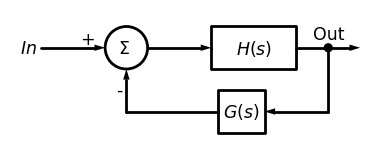

In [1]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()


Now that we have the block diagram for the new system, Q(s), we need to design G(s) to ensure all the poles are int he the LHP.  It can be help to break up H(s) into the numerator and denominator.
$$H(s)=\frac{N(s)}{D(s)}$$
In this example $N(s)=1$, and $D(s)=s-1$.
Substitute N(s) and D(s) into Q(s)
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$

If we look at the above equation we see the numerator of Q(s) is the same as the numerator as H(s), and the original D(s) of H(s) is in Q(s)'s denominator.  What has changed is that the new denominator has a new term summed to the original D(s): G(s)N(s) now to make sure all the poles of Q(s) are int he LHP, we just have to choose a G(s) that makes roots of $D(s)+G(s)N(s)$ all on the LHP.

In this example: 
$$Q(s)=\frac{1}{s^2+100+G(s)\times 1}$$
What $G(s)\times 1$ will turn the real part of the poles at $\pm10j$, negative?
In this case we need proportional feedback times derivative, so $G(s)=sK$.
The pole becomes:
The new Q(s) becomes:
$$Q(s)=\frac{1}{s+100+Ks\times 10}=\frac{1}{s+10Ks+100}$$  if K>0, then the system will be in control.

**How did I determine we needed Ks control?**
If we look at the quadratic equation for D(s) of the original transfer function:
$$Roots_{1,2}(Poles)=\frac{-b\pm \sqrt{b^2-4ac}}{2}$$

a=1, b=0, c= 100
$$Roots_{1,2}(Poles)=\frac{0\pm \sqrt{0-400}}{2}=\pm 10j$$

To have the poles haver a negative real part, we need b to be a positive, real number.

$$Q(s)=\frac{1}{s^2+100+G(s)\times 10}=\frac{1}{s^2+bs+100}$$
where $bs=G(s)\times 10$  Solve for G(s):

$$G(s)=\frac{bs}{10}$$  repalce K for b to put the expression into control format.

$$G(s)\frac{Ks}{10}$$ 

Now:

$$Q(s)=\frac{1}{s^2+\frac{K}{10}s+100}$$

Substitute back into the quadratic equation:

a=1, b=\frac{K}{10}, c= 100
$$Roots_{1,2}(Poles)=\frac{-\frac{K}{10}\pm \sqrt{\left( \frac{K}{10}\right)^2-400}}{2}$$
If K>0  then $\sqrt{\left(\frac{K}{10}\right)^2-400}$ will always be less than $\frac{K}{10}$ and the roots can never be greater than or equal to zero so the system will be in control.  That being said the closer K is to zero, the greater the ration between the imaginary part of the pole will be to the real part of the pole and the system will be more underdamped. (more oscillations)
 


In [2]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
from sympy import *
K= symbols("K", positive=True)
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(10/(s**2+100)).simplify()
G=s/10*K
 
Q=H/(1+G*H).normal()
Q



      10      
──────────────
       2      
K⋅s + s  + 100

In [3]:
Q=Q.subs(K,20)
Q

       10      
───────────────
 2             
s  + 20⋅s + 100

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

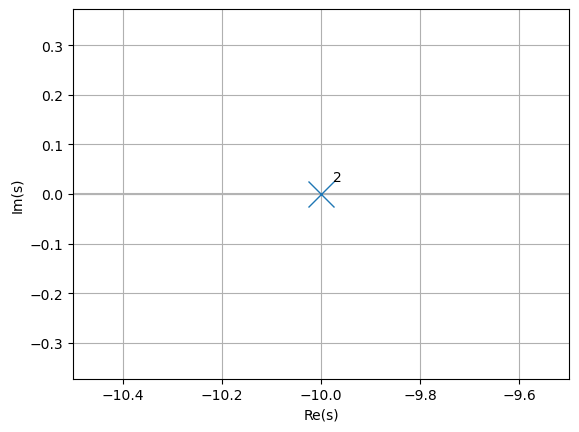

In [4]:
Q.plot()

In [5]:
Q.poles()

We can see the repeated poles are now on the LHP.

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

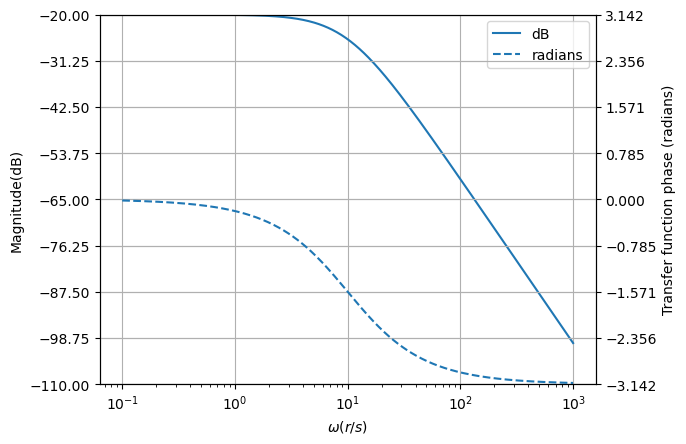

In [6]:
A = Q.subs(j * f)
fv = np.logspace(-1, 3, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

This looks is a regular low pass filter.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

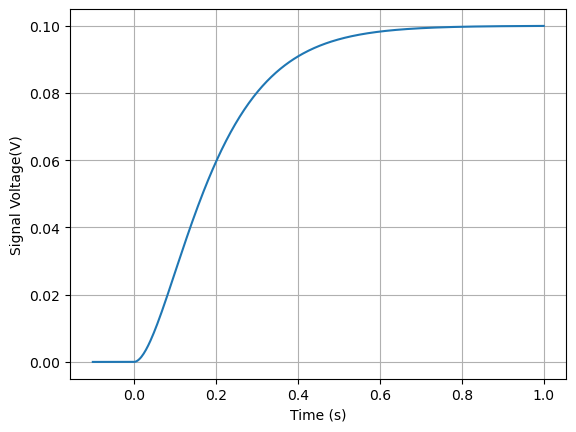

In [7]:
tv = np.linspace(-.1, 1, 400)
STEP=1/s 
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

The step response is exponentially approaches a constant value, therefore it is in control.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

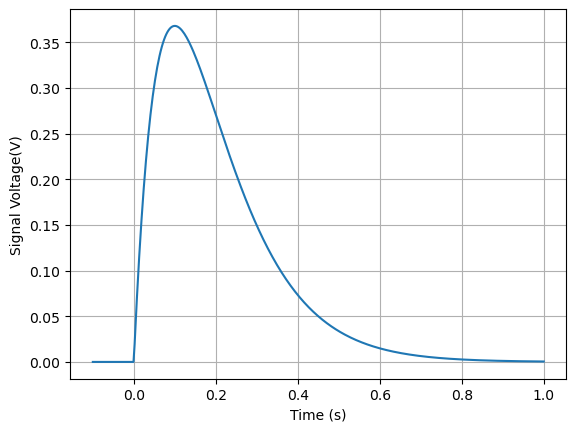

In [8]:
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

The impulse response is exponentially decreasing, therefore it is in control.

## Extra Example

$H(s)=\frac{s^2}{s^2+100}$
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$
$$Q(s)=\frac{s^2}{s+100+G(s)\times s^2}$$
 
Assume $G(s)=\frac{K}{s}$.

$$Q(s)=\frac{s^2}{s+100+\frac{K}{s}\times s}=\frac{s^2}{s^2+Ks+100}$$

As in the above example K>0 to make the system in control.


In [9]:
H=transfer(s**2/(s**2+100)).simplify()
G=K/s
Q=H/(1+G*H).normal()
Q

       2      
      s       
──────────────
       2      
K⋅s + s  + 100

In [10]:
Q=Q.subs(K,20)
Q


        2      
       s       
───────────────
 2             
s  + 20⋅s + 100

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

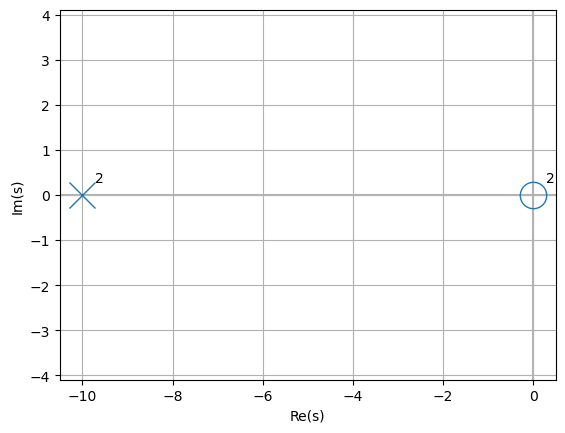

In [11]:
Q.plot()

In [12]:
Q.poles()

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

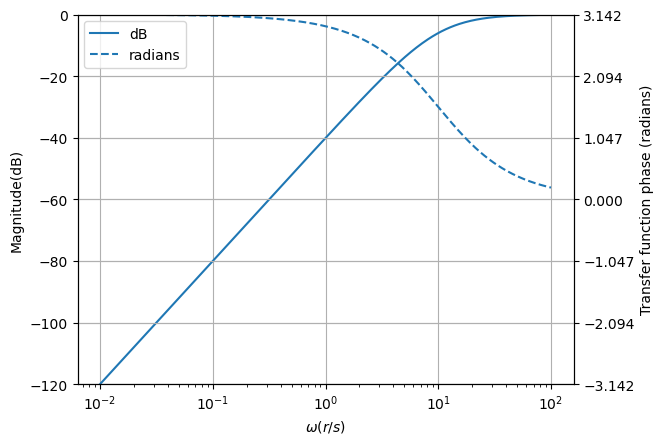

In [13]:
A = Q.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

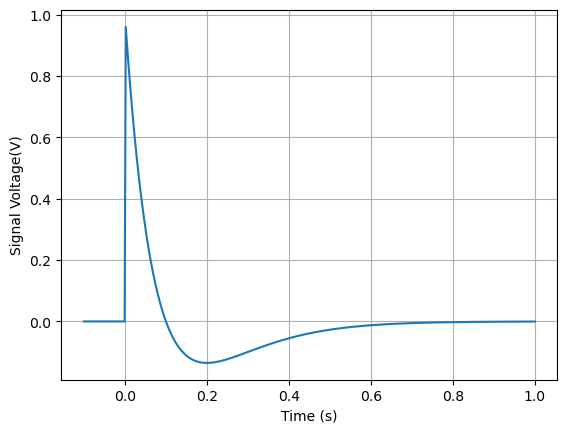

In [14]:
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

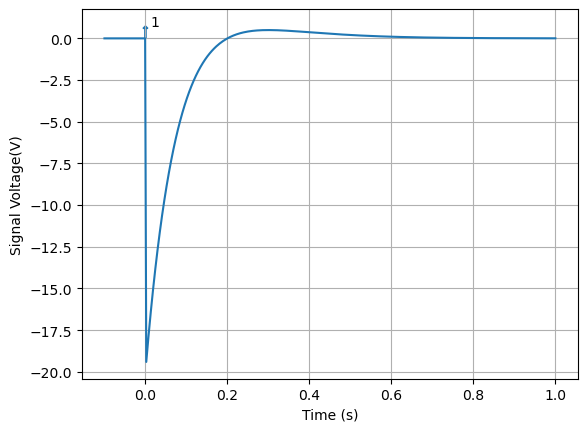

In [15]:
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')